In [53]:
from general_method.set_geom_prob import visibility
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import os
import pandas as pd

In [107]:
def data_parser(dirname):
    
    keys = ['num of observables', 'maximum length of sequences', 'num of outcomes', 'sequences method', 'dimension behaviors', 'dimension base', 'level', 'probability out', 'base ranks']
    data = pd.DataFrame(columns=keys)
    for file in os.listdir(dirname):
        #print(file)
        filename = "%s/%s" % (dirname, file)
        with open(filename) as json_file:
            temp_data = json.load(json_file)
        
        temp_data['probability out'] = prob_out(temp_data)

        del temp_data["visibilities"]
        
        temp_df = pd.Series(temp_data)
        data = data.append(temp_df, ignore_index=True)
        
    return data


def plot_vis_distri(filename):
    
    with open(filename) as json_file:
        data = json.load(json_file)
    
    eta = data['visibilities']

    plt.figure(figsize=(10,5))
    ax = sns.distplot(eta, hist=True, kde=True,
                 bins=int(len(eta)/10), color = 'darkblue',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})
    ax.set(xlabel='Visibility')

    eta_in = [i for i in eta if i>=0.9999]
    eta_out = [i for i in eta if i<0.9999]


    print("Data size: ", len(eta))
    print("Min: ", min(eta))
    print("Max: ", max(eta))
    print("Probability out: ", len(eta_out)/len(eta))
    
    
def prob_out(data):
    
    eta = data['visibilities']
    if len(eta) == 0:
        return 
    
    eta_out = [i for i in eta if i<0.9999]
    return len(eta_out)/len(eta)

In [112]:
filename = "general_method/data"
data = data_parser(filename)

data

,num of observables,maximum length of sequences,num of outcomes,sequences method,dimension behaviors,dimension base,level,probability out,base ranks
0,3,2,2,sel_sequences,5,2,1,0.215904,35
1,3,2,2,sel_sequences,3,2,4,None,286
2,3,2,2,sel_sequences,4,2,1,0.268526,35
3,3,2,2,sel_sequences,3,2,1,0.365198,35
4,3,2,2,sel_sequences,3,2,3,None,165
5,4,2,2,sel_sequences,3,2,1,0.782427,102
6,3,2,2,sel_sequences,3,2,2,0.392267,84
7,3,2,2,sel_sequences,4,2,2,0.317939,84
8,3,2,2,sel_sequences,5,2,2,0.247898,84


Data size:  9781
Min:  2.818850071571792e-07
Max:  3.2352471320642007
Probability out:  0.3651978325324609


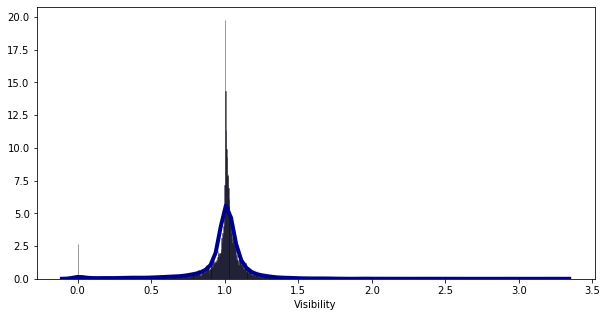

In [78]:
filename = "general_method/data/3-num_obs-2-len_seq-1-out_max-3-dim_behavior-2-dim_base-1-level.json"
plot_vis_distri(filename)

Data size:  4912
Min:  1.5354578251022311e-06
Max:  2.6144360891264835
Probability out:  0.2685260586319218


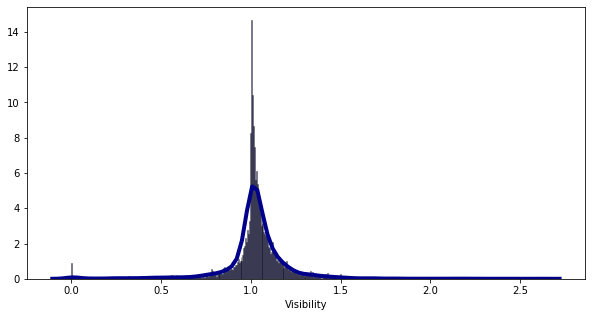

In [113]:
filename = "general_method/data/3-num_obs-2-len_seq-1-out_max-4-dim_behavior-2-dim_base-1-level.json"
plot_vis_distri(filename)

# Scenario 3-2-2 with Q2

In [46]:
data.keys()fig = plt.subplots(figsize=(8,5))
plt.plot(range(1,len(prob_out)+1), prob_out, color='red', marker='o')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Probability out', fontsize=14)
plt.grid(True)
plt.show()

dict_keys(['num of observables', 'maximum length of sequences', 'num of outcomes', 'sequences method', 'dimension behaviors', 'dimension base', 'level', 'visibilities', 'base ranks'])

In [43]:
all_prob

[0.2159044921084581,
 None,
 0.2685260586319218,
 0.3651978325324609,
 None,
 0.7824267782426778,
 0.39226691612098535,
 0.3179392446633826,
 0.24789829813409883]